In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pytz import utc
data = pd.read_csv("reviews.csv",parse_dates=["Timestamp"])

### Rating average/Count per day

In [4]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [3]:
data["Day"] = data["Timestamp"].dt.date
day_average_rating = data.groupby(["Day"]).mean()
day_average_rating

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


In [4]:
day_average_rating.columns ##Rating is the only column, date is the index

Index(['Rating'], dtype='object')

In [5]:
##if you want o index the special column thaat is the index you give : 
day_average_rating.index## return type seeries object
##Converting to list we have:
list(day_average_rating.index)

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 27),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4)

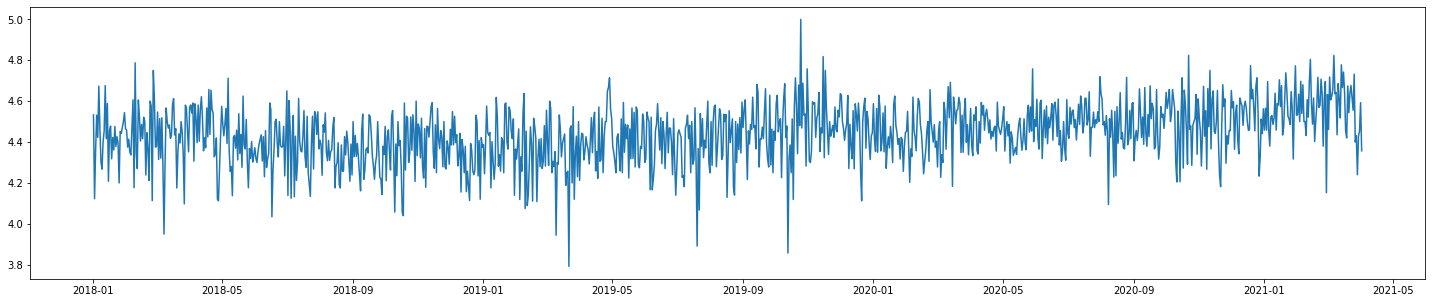

In [13]:
plt.figure(figsize=(25,5))
plt.plot(day_average_rating.index,day_average_rating["Rating"])


In [9]:
day_average_rating["Rating"].max()

5.0

In [11]:
day_average_rating["Rating"].min()

3.7916666666666665

In [15]:
data["Day"] = data["Timestamp"].dt.date
day_average_rating = data.groupby(["Day"]).count()
day_average_rating

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15
...,...,...,...,...
2021-03-29,25,25,25,1
2021-03-30,35,35,35,1
2021-03-31,32,32,32,3


### Rating average per week

In [5]:
data['week']=data['Timestamp'].dt.week

<ipython-input-5-12fb057b5495>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week']=data['Timestamp'].dt.week


In [22]:
data['week'].max()

53

In [6]:
data['week'].min()

1

In [9]:
data.head()

,Course Name,Timestamp,Rating,Comment,week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,13


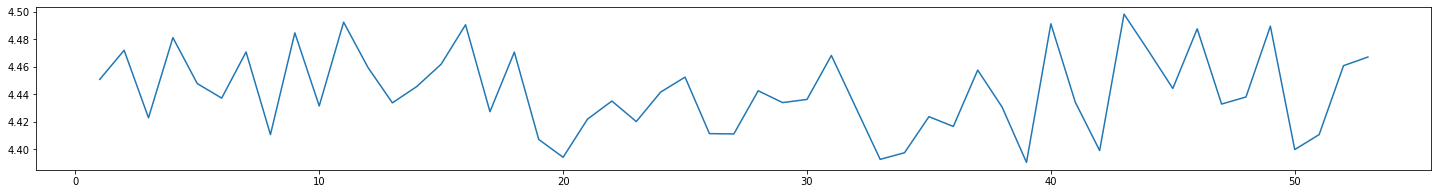

In [13]:
week_average=data.groupby(["week"]).mean()
plt.figure(figsize=(25,3))
plt.plot(week_average.index,week_average["Rating"])

### Average by month

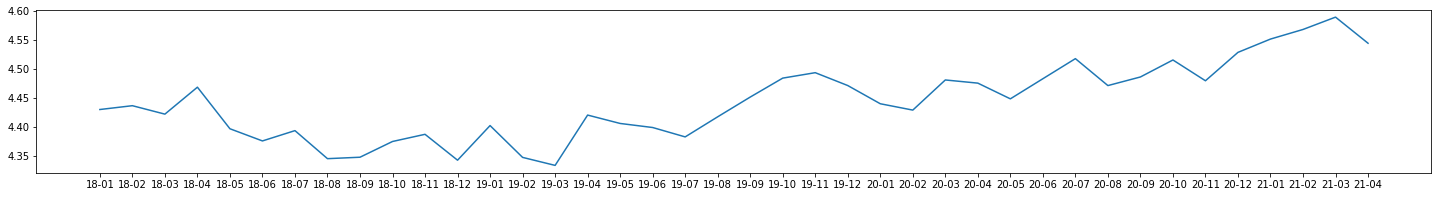

In [18]:
data["Month"] = data["Timestamp"].dt.strftime("%y-%m")
month_average=data.groupby(["Month"]).mean()

plt.figure(figsize=(25,3))
plt.plot(month_average.index,month_average["Rating"])

### Aerage rating by month by course

In [22]:
data["Month"]=data["Timestamp"].dt.strftime("%y-%m")
monthly_avg_crs = data.groupby(["Month","Course Name"]).mean()
monthly_avg_crs

Rating       week
Month Course Name                                                            
18-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448   2.741379
      Data Processing with Python                         4.500000   2.666667
      Interactive Data Visualization with Python and ...  4.285714   2.942857
      Learn GIS in One Hour                               4.236842   3.578947
      Python for Beginners with Examples                  4.355422   2.835341
...                                                            ...        ...
21-03 The Python Mega Course: Build 10 Real World App...  4.632018  10.676783
21-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000  13.000000
      Interactive Data Visualization with Python and ...  5.000000  13.000000
      The Complete Python Course: Build 10 Profession...  4.250000  13.000000
      The Python Mega Course: Build 10 Real World App...  4.576923  13.000000

[262 rows x 2 columns]